In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [8]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [9]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## What determines diamond's cost?

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [10]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

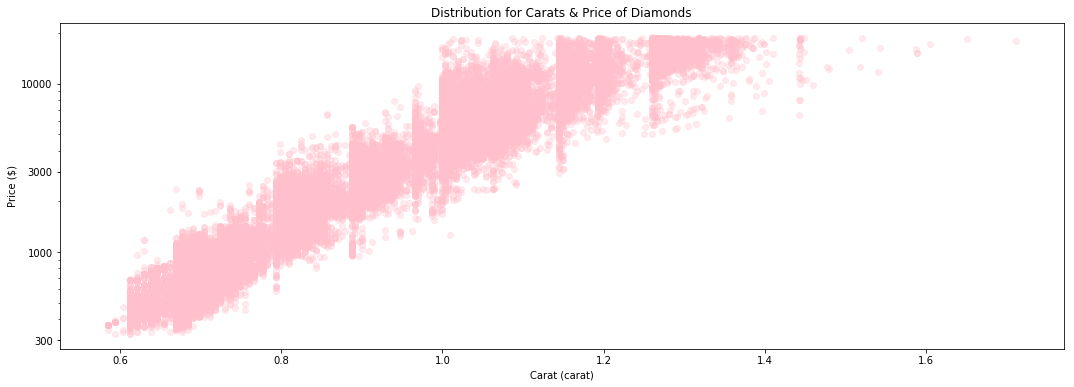

In [20]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [18, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', color='pink', alpha=0.3)

yticks = [300,1000,3000,10000]
plt.title('Distribution for Carats & Price of Diamonds')
plt.xlabel('Carat (carat)')
plt.ylabel('Price ($)')

plt.yscale('log')
plt.yticks(yticks, np.array(yticks).astype(str))

plt.show()

Price vs. Carat Polishing comment 1: Use the following list to make sure you've checked the major points of revision in this plot.
- <span style="color:black">Tiltle for the graph added : 'Distribution for Carats and Price of Diamonds'</span>
- <span style="color:black">Axis label for the y-axis was added as 'Price ($)', while the axis label for the x-axis was altered to 'Carat (carat)'</span>
- <span style="color:black">The tick values for the y-axis were updated for better human comprehension.</span>
- <span style="color:black">The color for the plot was changed to a softer color and the transparency we also decreased to better distinguish between the plot results of the graph. </span>

Price vs. Carat Polishing comment 2: Here are some specific comments on the polishing of the plot.

- <span style="color:black">The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-3-10-30 sequence to set which tick marks to show.</span>
- <span style="color:black">As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.</span>
- <span style="color:black">There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.</span>

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [12]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

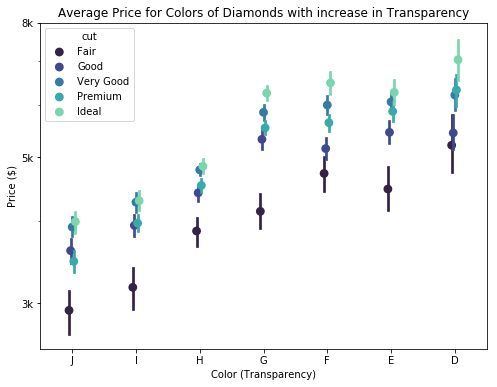

In [29]:
plt.figure(figsize = [8,6])

# sb.color_palette("mako")
ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut', dodge= 0.1, linestyles = "", palette = "mako")

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.title('Average Price for Colors of Diamonds with increase in Transparency')
plt.xlabel('Color (Transparency)')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();

Price vs. Color, Cut: Polishing comment 1: <span style="color:black"> title: 'Average Price for Colors of Diamonds with increase in Transparency', x-axis label: 'Color (Transparency)', y-axis label: 'Price ($)'.</span>

Price vs. Color, Cut: Polishing comment 2: <span style="color:black"> sequential palette "mako" added as the palette parameter. Dodge parameter set to '0.1'. The line connecting points on each level of cut by using the linestyle parameter.</span>

> If you want to check your work on the case study against a reference, take a look at the example project in the [Resources](https://video.udacity-data.com/topher/2021/May/60a8045e_communicate-data-example-project/communicate-data-example-project.zip)! The example project is based on the same diamonds dataset, and all of the plots that you've worked on in this lesson are also covered there.